<a href="https://colab.research.google.com/github/Sinudeshmukh/Basic-Projects/blob/main/FakeNews_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

##Loading dataset

In [3]:
data = pd.read_csv("fake_or_real_news.csv")
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


##Exploratory Data Analysis

In [5]:
data = data.drop(['Unnamed: 0'],axis=1)
data.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


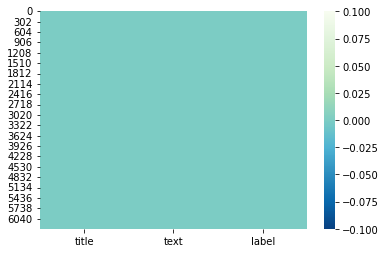

In [17]:
sns.heatmap(data.isnull(),cmap='GnBu_r')

In [19]:
data = data.dropna()

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 198.0+ KB


In [20]:
data.describe().T

,count,unique,top,freq
title,6335,6256,OnPolitics | 's politics blog,5
text,6335,6060,"Killing Obama administration rules, dismantlin...",58
label,6335,2,REAL,3171


####Let's add a column as a part of Feature Engg to check the number of words in the title

In [24]:
data['length'] = data['title'].apply(len)
data.head()

,title,text,label,length
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,43
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,84
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,48


In [30]:
data['length'].describe()

count    6335.000000
mean       65.277664
std        23.733657
min         1.000000
25%        49.000000
50%        64.000000
75%        78.000000
max       289.000000
Name: length, dtype: float64

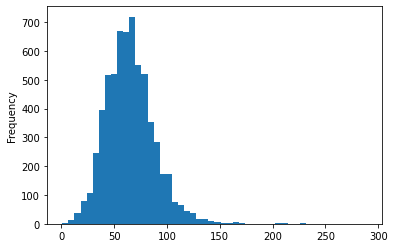

In [25]:
data['length'].plot(kind='hist',bins=50)

###Assigning X and y variables

In [6]:
x = np.array(data["title"])
y = np.array(data["label"])

###Convert text data in matrix form using count vectorizer 

In [7]:
cv = CountVectorizer()
x = cv.fit_transform(x)

###Train Test Split

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.8074191002367798


In [12]:
y_pred = model.predict(xtest)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

        FAKE       0.84      0.76      0.80       628
        REAL       0.78      0.86      0.82       639

    accuracy                           0.81      1267
   macro avg       0.81      0.81      0.81      1267
weighted avg       0.81      0.81      0.81      1267



###Model Testing using random news

In [31]:
news_headline = "CA Exams 2021: Supreme Court asks ICAI to extend opt-out option for July exams, final order tomorrow"

In [43]:
cv1 = cv.transform([news_headline]).toarray()

In [44]:
cv1

array([[0, 0, 0, ..., 0, 0, 0]])

In [50]:
print(model.predict(cv1))

['REAL']


In [47]:
news_headline2 = "Cow dung can cure Corona Virus"
cv2 = cv.transform([news_headline]).toarray()

In [49]:
print(model.predict(cv2))

['FAKE']


###We can clearly see that model works well with fake news detection